# importing libraries and datasets

In [34]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
dataset = pd.read_csv('./datasets/Clean_Dataset.csv')
dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data cleaning

In [36]:
dataset.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [37]:
# checking for null values
dataset.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# checking for correlation

#### some columns are in string format, it is best to encode them using labelencoder

In [38]:
# label encoding all the string datatype columns
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset_copy = dataset
dataset_copy['airline'] = encoder.fit_transform(dataset_copy['airline'])
dataset_copy['flight'] = encoder.fit_transform(dataset_copy['flight'])
dataset_copy['source_city'] = encoder.fit_transform(dataset_copy['source_city'])
dataset_copy['departure_time'] = encoder.fit_transform(dataset_copy['departure_time'])
dataset_copy['stops'] = encoder.fit_transform(dataset_copy['stops'])
dataset_copy['arrival_time'] = encoder.fit_transform(dataset_copy['arrival_time'])
dataset_copy['destination_city'] = encoder.fit_transform(dataset_copy['destination_city'])
dataset_copy['class'] = encoder.fit_transform(dataset_copy['class'])
dataset_copy.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [39]:
# saving a labelencoded version of the dataset
dataset_copy.to_csv('./datasets/label_encoded_dataset.csv',index=False)

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'airline'),
 Text(2.5, 0, 'flight'),
 Text(3.5, 0, 'source_city'),
 Text(4.5, 0, 'departure_time'),
 Text(5.5, 0, 'stops'),
 Text(6.5, 0, 'arrival_time'),
 Text(7.5, 0, 'destination_city'),
 Text(8.5, 0, 'class'),
 Text(9.5, 0, 'duration'),
 Text(10.5, 0, 'days_left'),
 Text(11.5, 0, 'price')]

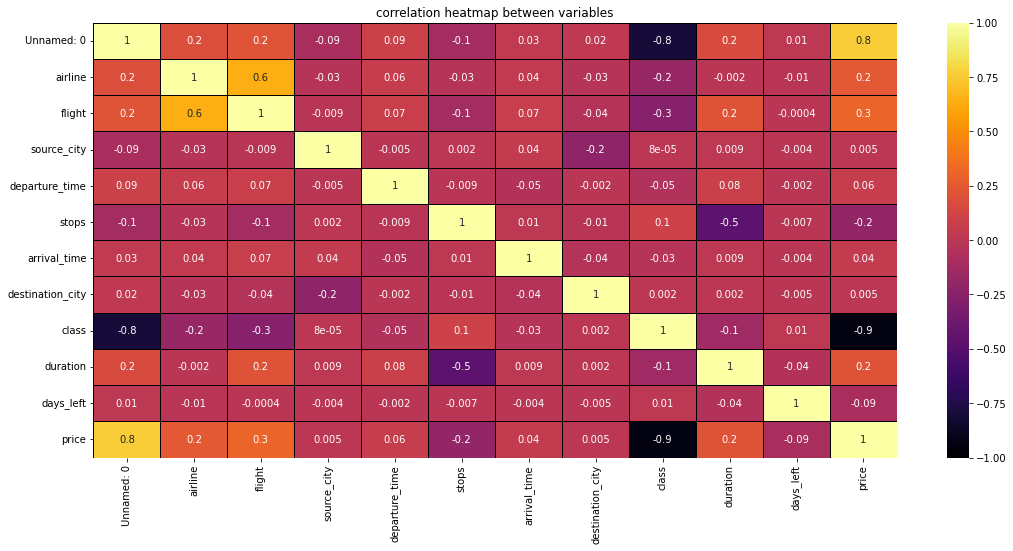

In [40]:
fig = (18,8)
plt.figure(figsize=fig)
heatmap = sns.heatmap(dataset_copy.corr(method='pearson'), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('correlation heatmap between variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

# data featuring and selection

In [41]:
# selecting columns that affect the price
dataset_selected_features = dataset[['airline','flight','stops','class','duration','price']]
dataset_selected_features.head()

,airline,flight,stops,class,duration,price
0,4,1408,2,1,2.17,5953
1,4,1387,2,1,2.33,5953
2,0,1213,2,1,2.17,5956
3,5,1559,2,1,2.25,5955
4,5,1549,2,1,2.33,5955


In [42]:
# splitting into x and y variables
cols = dataset_selected_features.shape[1]
x = dataset_selected_features[['airline','flight','stops','class','duration']]
y = dataset_selected_features['price']

In [43]:
# splitting into testing and training
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0)

# creating a model for the flight ticket price prediction using 

In [44]:
# importing models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# importing metrics
from sklearn.metrics import mean_squared_error, r2_score

### linear regression

In [45]:
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

print("intercept", model1.intercept_)
print("coefficients", model1.coef_)

# predicting
ypred1 = model1.predict(xtest)
ypredtrain1 = model1.predict(xtrain)

# evaluation of model
print("evaluation on tests",r2_score(ytest, ypred1))
print("evaluation on train",r2_score(ytrain, ypredtrain1))

intercept 48048.28010507011
coefficients [ 9.38650084e+02  2.05533389e-01 -3.16754828e+03 -4.45688691e+04
  1.05705442e+02]
evaluation on tests 0.8986374739952657
evaluation on train 0.8979609139938076


### decision tree regression

In [46]:
model3 = DecisionTreeRegressor()
model3.fit(xtrain, ytrain)

# print("intercept", model3.intercept_)
# print("coefficients", model3.coef_)

# predicting
ypred3 = model3.predict(xtest)
ypredtrain3 = model3.predict(xtrain)

# evaluation of model
print("evaluation on test",r2_score(ytest, ypred3))
print("evaluation on train",r2_score(ytrain, ypredtrain3))

evaluation on test 0.9748911655693738
evaluation on train 0.9785270668450166


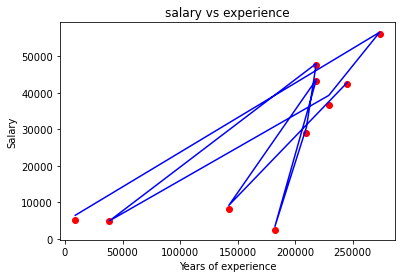

In [51]:
plt.scatter(xtrain.index[:10], ytrain[:10], color='red')
plt.plot(xtrain.index[:10], ypredtrain3[:10], color='blue')
plt.title('salary vs experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

### polynomial regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
xtrainpoly = poly.fit_transform(xtrain)
xtestpoly = poly.fit_transform(xtest)

model4 = LinearRegression()
model4.fit(xtrainpoly, ytrain)

# predicting
ypred4 = model4.predict(xtestpoly)
ypredtrain4 = model4.predict(xtrainpoly)

# evaluation of model
print("evaluation on test",r2_score(ytest, ypred4))
print("evaluation on train",r2_score(ytrain, ypredtrain4))

evaluation on test 0.9261220101656936
evaluation on train 0.9248278173277713


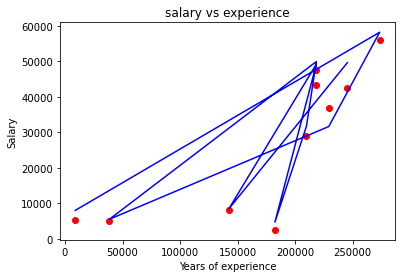

In [52]:
plt.scatter(xtrain.index[:10], ytrain[:10], color='red')
plt.plot(xtrain.index[:10], ypredtrain4[:10], color='blue')
plt.title('salary vs experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

## the hightest performing model from the results is Decision Tree, it is the one we are going to save

# Saving the model

### saving in pickle format

In [29]:
import pickle

In [30]:
pickle.dump(model3, open('models/flight_ticket_price_model.pkl','wb'))

### saving in sav joblib format

In [31]:
import joblib

In [32]:
joblib.dump(model3, open('models/flight_ticket_price_model.sav','wb'))